# Data Normalization for the images

In [1]:
import keras
import os
import numpy as np
import pandas as pd

from MyUtils.Dataset import DatasetLoader

Using TensorFlow backend.


In [2]:
print(keras.__version__)

2.2.4


In [3]:
ROOT_DIR='/Users/abalaji/mydata/DataScience/TinyImageNet'
IMAGE_ROOT_DIR=os.path.join(ROOT_DIR, 'tiny-imagenet-200')

# utilities.
UTILS_ROOT_DIR='/Users/abalaji/Documents/GitProjects/Projects/Images_ML/TinyImageNet'
MY_UTILS_DIR= os.path.join(UTILS_ROOT_DIR,'MyUtils')
SUPPORT_FILES_DIR=os.path.join(MY_UTILS_DIR, 'SupportFiles')

In [8]:
## set up the data loader
dataLoader = DatasetLoader(IMAGE_ROOT_DIR)
dataLoader.set_support_files_dir(SUPPORT_FILES_DIR)

## get all class ids and their names.
(class_id_arr, class_names_arr) = dataLoader.get_class_info()

## just get only one class of data
(training_images, training_label_ids) = dataLoader.load_training_images_for_a_list_classes(class_id_arr[0:1])

## get their filenames as well
training_filenames = dataLoader.get_training_file_names(class_id_arr[0:1])

In [10]:
print(len(training_images))
print(len(training_filenames))

500
500


In [11]:
training_filenames[0:10]

array(['/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-200/train/n02124075/images/n02124075_0.JPEG',
       '/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-200/train/n02124075/images/n02124075_1.JPEG',
       '/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-200/train/n02124075/images/n02124075_10.JPEG',
       '/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-200/train/n02124075/images/n02124075_100.JPEG',
       '/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-200/train/n02124075/images/n02124075_101.JPEG',
       '/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-200/train/n02124075/images/n02124075_102.JPEG',
       '/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-200/train/n02124075/images/n02124075_103.JPEG',
       '/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-200/train/n02124075/images/n02124075_104.JPEG',
       '/Users/abalaji/mydata/DataScience/TinyImageNet/tiny-imagenet-

## Display Images

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

import cv2

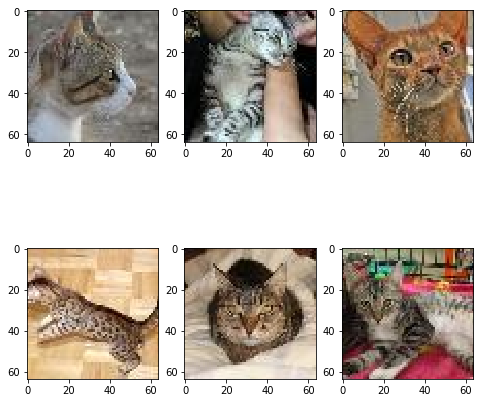

In [37]:
rows = 2
columns = 3

images = []

for i in range(0,6):
    img = training_images[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

fig = plt.figure(figsize=(8,8))

for i in range(1, rows*columns+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i-1])
plt.show()

## Calculate the Mean of the Six Images

In [29]:
R, G, B = [], [], []
for i in range(0,6):
    img = training_images[i]
    # img is in BGR format
    (b, g, r) = cv2.mean(img)[:3]
    B.append(b)
    G.append(g)
    R.append(r)

# calculate the R, G, B mean for all six images
print('R channel mean: %f' % np.mean(R) )
print('G channel mean: %f' % np.mean(G))
print('B channel mean: %f' % np.mean(B))
    


R channel mean: 143.783895
G channel mean: 124.831421
B channel mean: 107.398885


## Display the images after Normalization (Mean Subtraction)

In [44]:
## compute normalized images
norm_images = []
for i in range(0,6):
    img = training_images[i]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    (r, g, b) = cv2.split(img.astype('float32'))
    
    r -= np.mean(R)
    g -= np.mean(G)
    b -= np.mean(B)
    
    norm_images.append(cv2.merge([r, g, b]))


In [45]:
len(norm_images)

6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


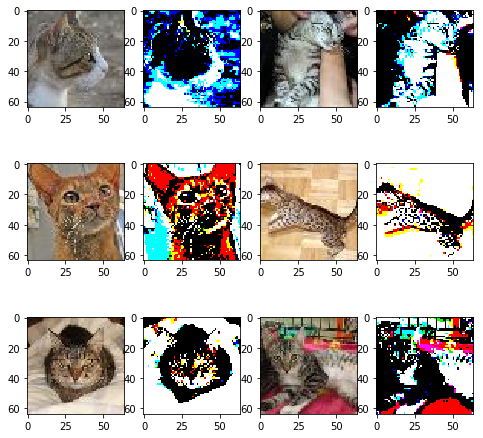

In [46]:



## show both the original and normalized images side by side.

rows = 3
columns = 4

fig = plt.figure(figsize=(8,8))

# for plots it starts from 1 onwards
idx = 0
for i in range(1, rows*columns+1,2):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[idx])
    
    #norm images
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(norm_images[idx])
    idx += 1
    
plt.show()

## Dump the Mean Values for later processing

In [48]:
import json

In [50]:
Dict = { "R": np.mean(R),
         "G": np.mean(G),
         "B": np.mean(B)
       }

f = open("ImageData_MEAN", "w")
f.write(json.dumps(Dict))
f.close()

In [51]:
!ls -l ImageData_Mean

-rw-r--r--  1 abalaji  staff  74 Mar 18 21:45 ImageData_Mean


In [52]:
!more ImageData_Mean

{"R": 143.78389485677084, "G": 124.8314208984375, "B": 107.39888509114583}
>

In [54]:
rMean = 14
gMean = 124.83
bMean = 107.39

def mean_subtraction(img):
    
    (r_init, g_init, b_init) = cv2.split(img.astype('float32'))
    
    r = r_init - rMean
    g = g_init - gMean
    b = b_init - bMean
    
    new_img = cv2.merge([r, g, b])
    return new_img

In [55]:
mod_img = mean_subtraction(training_images[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


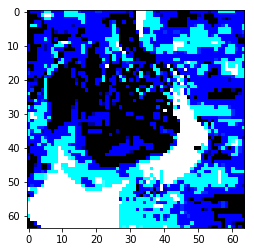

In [56]:
plt.imshow(mod_img)
plt.show()